In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2019, 12, 28, 22, 7, 45, 171075)

In [4]:
print(now.year, now.month, now.day)

2019 12 28


In [7]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print('This is delta: ', delta) 
print('This is delts days: ', delta.days) 
print('This is delta seconds: ', delta.seconds)

This is delta:  926 days, 15:45:00
This is delts days:  926
This is delta seconds:  56700


In [9]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [10]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [12]:
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [14]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [16]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [18]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [19]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [20]:
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isnull(idx)

array([False, False,  True])

In [22]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.199610
2011-01-05   -0.566874
2011-01-07    0.628441
2011-01-08    0.247862
2011-01-10   -0.134353
2011-01-12   -0.117871
dtype: float64

In [23]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [24]:
stamp = ts.index[2]
ts[stamp]

0.6284405035470123

In [25]:
ts['1/10/2011']
ts['20110110']

-0.13435250250782968

In [28]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts['2001']

2001-01-01    2.635226
2001-01-02   -0.794174
2001-01-03   -0.339197
2001-01-04   -1.450484
2001-01-05    1.069317
                ...   
2001-12-27   -0.523796
2001-12-28    0.682226
2001-12-29   -0.043650
2001-12-30    0.484474
2001-12-31   -0.099709
Freq: D, Length: 365, dtype: float64

In [29]:
longer_ts['2001-05']

2001-05-01   -0.927810
2001-05-02    0.103082
2001-05-03   -0.183561
2001-05-04   -1.221493
2001-05-05   -1.475166
2001-05-06   -0.204131
2001-05-07   -0.489978
2001-05-08    0.297126
2001-05-09   -1.130664
2001-05-10    1.037973
2001-05-11    0.313763
2001-05-12    1.167442
2001-05-13   -1.636885
2001-05-14   -0.068536
2001-05-15   -0.777893
2001-05-16   -1.175655
2001-05-17    0.163442
2001-05-18    0.760315
2001-05-19    1.665647
2001-05-20   -0.782935
2001-05-21   -0.126812
2001-05-22   -2.005804
2001-05-23   -0.217869
2001-05-24   -2.097551
2001-05-25    0.520689
2001-05-26   -1.031346
2001-05-27   -0.066741
2001-05-28   -2.032725
2001-05-29    0.651439
2001-05-30    0.015490
2001-05-31   -1.704814
Freq: D, dtype: float64

In [30]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.628441
2011-01-08    0.247862
2011-01-10   -0.134353
2011-01-12   -0.117871
dtype: float64

In [31]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [32]:
dup_ts.index.is_unique

False

In [33]:
dup_ts['1/3/2000'] 

4

In [34]:
dup_ts['1/2/2000'] 

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [36]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [37]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [38]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [39]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [40]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [41]:
Hour(2) + Minute(30)

<150 * Minutes>

In [42]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [43]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [44]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [45]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [46]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [47]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [51]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


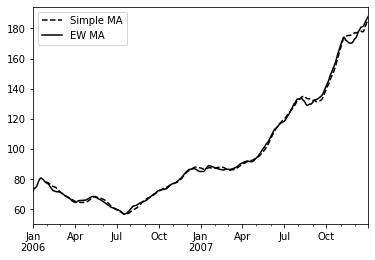

In [52]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()